# Chatbot Test Notebook

Analysis of a chatbot's performance using various metrics.

In [1]:
import textwrap
import json
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:

VECTORDB_SUFFIX = "_semantic"   # "_techrules"  "_semantic" 

In [3]:
# retrieve dataframe from pickle file
with open(f"../results/test_results_df{VECTORDB_SUFFIX}.pkl", "rb") as f:
    test_results_df = pickle.load(f)
test_results_df.head()

,question,situation,query_time,response_eval_time,llm_response,correctness_score,feedback,target
0,A breaststroke swimmer moves their hands in a ...,9,1.943868,4.508207,"No, the swimmer should not be disqualified. Ac...",False,The response claims that a sculling or flipper...,"No, the swimmer should not be disqualified. Th..."
1,"In a 9-10 100 yard breaststroke event, a swimm...",10,2.043054,2.158140,The swimmer should be disqualified. According ...,True,The output provided offered a precise explanat...,The swimmer left the wall on the back and then...
2,"In a 9-10 100 yard breaststroke event, a swimm...",11,1.524522,2.052882,The rules provided do not explicitly prohibit ...,False,The output provided by the model incorrectly s...,"No call should be made. The rule states, “It i..."
3,"In a senior 100 yard breaststroke event, the t...",12,2.765741,4.607714,Based on the provided rules and interpretation...,True,The model output aligns with the referencing o...,The swimmer should not be disqualified. The ru...
4,When a swimmer left the wall at the first turn...,13,4.292081,3.178363,"Yes, the swimmer should have been disqualified...",True,The output accurately addresses the rules surr...,"Yes. The rule states, “After the start and aft..."


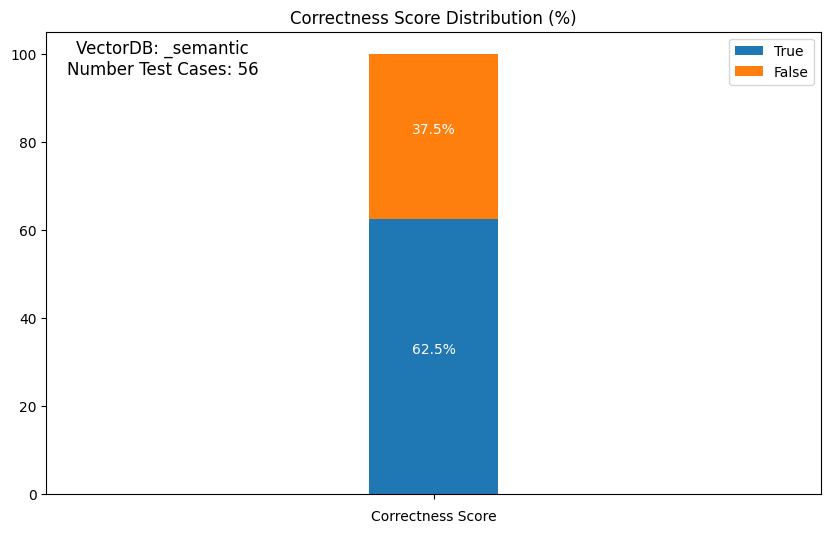

In [4]:

fig, ax = plt.subplots(figsize=(10, 6))
# Set the figure size
# Calculate value counts and normalize to percentages
value_counts = test_results_df['correctness_score'].value_counts(normalize=True).mul(100)


# Create a stacked bar plot
df = pd.DataFrame(value_counts).T
df.columns = value_counts.index.astype(str).to_list()
df.rename(index={"proportion": 'correctness_score'}, inplace=True)
df = df[["True", "False"]]
df.plot.bar(stacked=True, ax=ax, width=0.1)
plt.title('Correctness Score Distribution (%)')
ax.set_xticklabels([], rotation=0)
plt.xlabel('Correctness Score')


# label the bars with percentage values
value_patches = zip(value_counts, ax.patches)
for value, patch in value_patches:
    height = patch.get_height()
    ax.annotate(f'{value:.1f}%', 
                xy=(patch.get_x() + patch.get_width() / 2, patch.get_y() + value / 2), 
                ha='center', va='bottom', fontsize=10, color="white")
    
# annotate chart with number of test cases
total_test_cases = len(test_results_df)
ax.annotate(f'VectorDB: {VECTORDB_SUFFIX }\nNumber Test Cases: {total_test_cases}', 
            xy=(0.15, 0.9), 
            ha='center', va='bottom', fontsize=12, color="black", xycoords='axes fraction')


# Create stacked bar plot

plt.show()

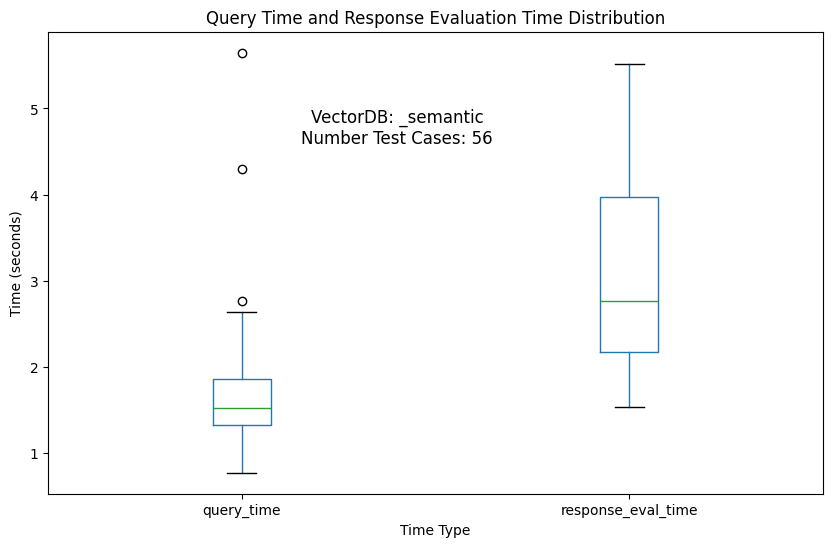

In [5]:
# boxplot for query_time and response_eval_time
fig, ax = plt.subplots(figsize=(10, 6)) 
# Set the figure size
# Create boxplot
test_results_df[["query_time", "response_eval_time"]].boxplot(ax=ax, grid=False)
plt.title('Query Time and Response Evaluation Time Distribution')
plt.ylabel('Time (seconds)')
plt.xlabel('Time Type') 

ax.annotate(f'VectorDB: {VECTORDB_SUFFIX }\nNumber Test Cases: {total_test_cases}', 
            xy=(0.45, 0.75), 
            ha='center', va='bottom', fontsize=12, color="black", xycoords='axes fraction')


plt.show()

In [6]:
test_results_df[["query_time", "response_eval_time"]].describe()

,query_time,response_eval_time
count,56.000000,56.000000
mean,1.693495,3.032563
std,0.781486,0.988427
min,0.775366,1.539540
25%,1.321850,2.169163
50%,1.523840,2.767524
75%,1.865568,3.968323
max,5.646574,5.515353


## Test Cases that Failed

In [7]:
for idx,row in test_results_df.iterrows():
    if not row['correctness_score']:
        print(f"\n>>>QUERY {row['situation']} {textwrap.fill(row['question'], width=90)}")
        print(f">>>ANSWER {textwrap.fill(row['llm_response'], width=90)}")
        print(f">>>TARGET {textwrap.fill(row['target'], width=90)}")
        print(f">>>CORRECTNESS {row['correctness_score']} ")
        print(f">>>FEEDBACK {textwrap.fill(row['feedback'], width=90)}")


>>>QUERY 9 A breaststroke swimmer moves their hands in a sculling or flipper movement at the end of
the first arm stroke, both after the start and after the turn. Should they be
disqualified?
>>>ANSWER No, the swimmer should not be disqualified. According to rule 101.2.2, after the start and
after each turn, the swimmer may take one arm stroke completely back to the legs. The
rules do not explicitly prohibit a sculling or flipper movement at the end of the first
arm stroke, so it is allowed.
>>>TARGET No, the swimmer should not be disqualified. This is legal provided, "All movements of the
arms shall be simultaneous without alternating movement." A sculling motion of the hands,
only as a part of the arm stroke, is not considered the beginning of a new stroke.
>>>CORRECTNESS False 
>>>FEEDBACK The response claims that a sculling or flipper movement after the start and turn is
permissible based on rule 101.2.2, which allows for one arm stroke back to the legs.
However, it does not expli

## Test Cases that Succeeded

In [8]:
for idx,row in test_results_df.iterrows():
    if row['correctness_score']:
        print(f"\n>>>QUERY {row['situation']} {textwrap.fill(row['question'], width=90)}")
        print(f">>>ANSWER {textwrap.fill(row['llm_response'], width=90)}")
        print(f">>>TARGET {textwrap.fill(row['target'], width=90)}")
        print(f">>>CORRECTNESS {row['correctness_score']} ")
        print(f">>>FEEDBACK {textwrap.fill(row['feedback'], width=90)}")


>>>QUERY 10 In a 9-10 100 yard breaststroke event, a swimmer completes 50 yards and, thinking that the
race is over, pushes back from the wall to read the scoreboard. At this point, realizing
that the race is only halfway over, the swimmer returns to the wall, pushes off on the
breast, and completes the required distance in good form. What call, if any, should be
made?
>>>ANSWER The swimmer should be disqualified. According to rule 101.2.2, in breaststroke, the body
must be kept on the breast throughout the race, except at the turn after the touch of the
wall. The swimmer pushed back from the wall to read the scoreboard, which is not in
compliance with maintaining the body on the breast. Additionally, the swimmer did not
complete the turn correctly as per rule 101.2.4, which requires a touch with both hands
separated and simultaneously at the wall. Therefore, the swimmer's actions constitute a
violation of the breaststroke rules.
>>>TARGET The swimmer left the wall on the back and the